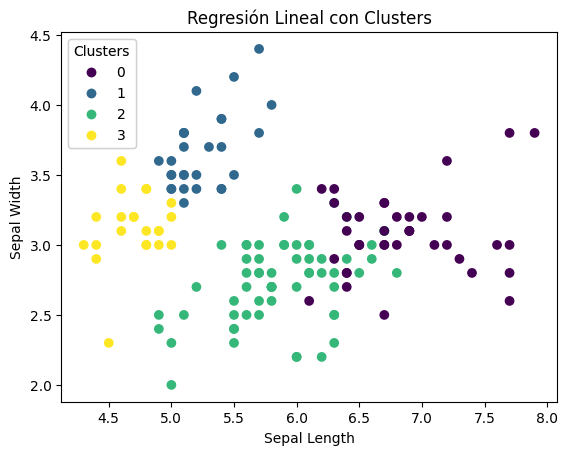

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.clustering import KMeans

spark = SparkSession.builder.getOrCreate()

datos = spark.read.csv("data/iris.csv", inferSchema="true", header="true")

input_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
assembler = VectorAssembler(inputCols=input_cols, outputCol="features")
final_data = assembler.transform(datos)

kmeans = KMeans(featuresCol="features", k=4)
model = kmeans.fit(final_data)
predictions = model.transform(final_data)
predictions = predictions.withColumnRenamed("prediction", "cluster")

lr = LinearRegression(featuresCol="features", labelCol="cluster")
lr_model = lr.fit(predictions.select("features", "cluster"))
regression_predictions = lr_model.transform(predictions)

predictions_pd = predictions.select("sepal_length", "sepal_width", "petal_length", "petal_width", "cluster").toPandas()
fig, ax = plt.subplots()
scatter = ax.scatter(predictions_pd["sepal_length"], predictions_pd["sepal_width"], c=predictions_pd["cluster"], cmap="viridis", label='Datos reales')

legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)

x = predictions_pd["sepal_length"]
y = predictions_pd["sepal_width"]
fit = lr_model.coefficients[0] * x + lr_model.coefficients[1] * y + lr_model.intercept

ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_title('Regresión Lineal con Clusters')

# Ajustar el límite inferior del eje y (Sepal Width) a 2.0
# ax.set_ylim(bottom=2.0)

plt.show()



In [9]:

# cluster_counts = predictions_pd["cluster"].value_counts()
num_points = len(predictions_pd["sepal_length"])

# Imprimir el resultado
print(f"Número de puntos en la gráfica: {num_points}")
# print("Número de puntos en cada clúster:")
# print(cluster_counts)


Número de puntos en la gráfica: 150


c:\Users\YeisonMC\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\collections.py:1109: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


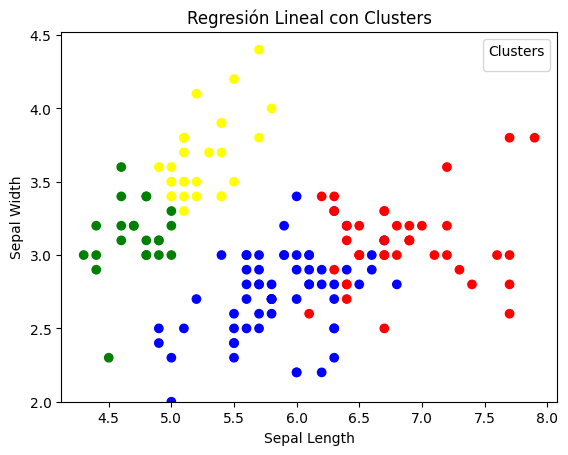

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.clustering import KMeans

spark = SparkSession.builder.getOrCreate()

datos = spark.read.csv("data/iris.csv", inferSchema="true", header="true")

input_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
assembler = VectorAssembler(inputCols=input_cols, outputCol="features")
final_data = assembler.transform(datos)

kmeans = KMeans(featuresCol="features", k=4)
model = kmeans.fit(final_data)
predictions = model.transform(final_data)
predictions = predictions.withColumnRenamed("prediction", "cluster")

lr = LinearRegression(featuresCol="features", labelCol="cluster")
lr_model = lr.fit(predictions.select("features", "cluster"))
regression_predictions = lr_model.transform(predictions)

predictions_pd = predictions.select("sepal_length", "sepal_width", "petal_length", "petal_width", "cluster").toPandas()
fig, ax = plt.subplots()

cluster_colors = {0: 'red', 1: 'yellow', 2: 'blue', 3: 'green'}
colors = predictions_pd["cluster"].map(cluster_colors)

scatter = ax.scatter(predictions_pd["sepal_length"], predictions_pd["sepal_width"], c=colors)

legend_labels = [f"Cluster {cluster}" for cluster in cluster_colors.keys()]

legend = ax.legend(handles=scatter.legend_elements()[0], labels=legend_labels, title="Clusters")
x = predictions_pd["sepal_length"]
y = predictions_pd["sepal_width"]
fit = lr_model.coefficients[0] * x + lr_model.coefficients[1] * y + lr_model.intercept


ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_title('Regresión Lineal con Clusters')

ax.set_ylim(bottom=2.0)

plt.show()
